In [2033]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
# %matplotlib inline

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans terminal


In [2034]:

csv_file1 = r"Y:\Documents\temp16122022.csv.old"
csv_file1 = r"Y:\Documents\temp03062024.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [2035]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data)
data

,temp
0,13.19
1,12.20
2,12.29
3,12.42
4,14.54
...,...
6264,4.85
6265,4.74
6266,4.70
6267,3.88


In [2036]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df

def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)


<Axes: >

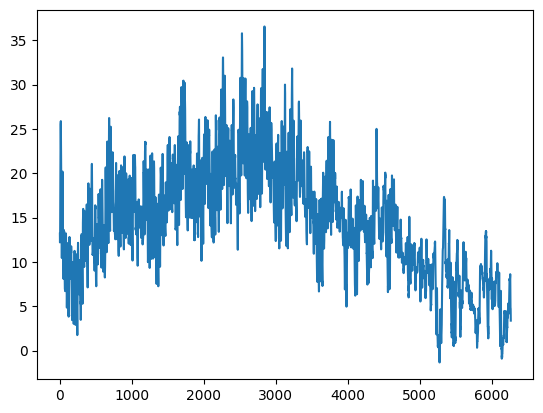

In [2037]:
data['temp'].plot()

In [2038]:
# convert string to datetime
date_time_str = '16/04/24 07:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
ref

datetime.datetime(2024, 4, 16, 7, 0)

In [2039]:
then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2024, 4, 16, 7, 0), datetime.datetime(2025, 1, 2, 12, 0))

In [2040]:
len(data)

6269

In [2041]:
date_time_str

'16/04/24 07:00:00'

In [2042]:
def mk_date(date_time_str,data):
    # 
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))


In [2043]:
hours = mk_date(date_time_str,data)
hours
#len(hours)

array([19829.29166667, 19829.33333333, 19829.375     , ...,
       20090.375     , 20090.41666667, 20090.45833333])

In [2044]:
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates

In [2045]:
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [2046]:
data[['dates','temp']]

,dates,temp
0,16/04/24 07:00:00,13.19
1,16/04/24 08:00:00,12.20
2,16/04/24 09:00:00,12.29
3,16/04/24 10:00:00,12.42
4,16/04/24 11:00:00,14.54
...,...,...
6264,02/01/25 07:00:00,4.85
6265,02/01/25 08:00:00,4.74
6266,02/01/25 09:00:00,4.70
6267,02/01/25 10:00:00,3.88


In [2047]:
import warnings
warnings.filterwarnings("ignore")


In [2048]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(       temp         hours              dates
 0     13.19  19829.291667  16/04/24 07:00:00
 1     12.20  19829.333333  16/04/24 08:00:00
 2     12.29  19829.375000  16/04/24 09:00:00
 3     12.42  19829.416667  16/04/24 10:00:00
 4     14.54  19829.458333  16/04/24 11:00:00
 ...     ...           ...                ...
 6264   4.85  20090.291667  02/01/25 07:00:00
 6265   4.74  20090.333333  02/01/25 08:00:00
 6266   4.70  20090.375000  02/01/25 09:00:00
 6267   3.88  20090.416667  02/01/25 10:00:00
 6268   3.37  20090.458333  02/01/25 11:00:00
 
 [6269 rows x 3 columns],
 6269)

In [2049]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [2050]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

19.400000000000016

In [2051]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

6245

In [2052]:
len(x)

6245

In [2053]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

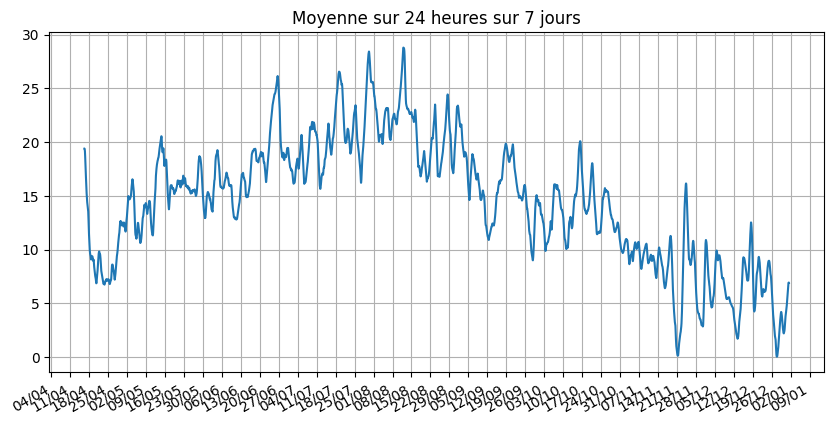

In [2054]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) #10 jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [2055]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=261, seconds=14168, microseconds=794454)

In [2056]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [2057]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2024, 4, 16, 7, 0),
 datetime.datetime(2025, 1, 2, 10, 56, 8, 794454),
 261)

In [2058]:
moyenne = data['temp'].mean()
moyenne

14.512842558621813

14.512842558621813

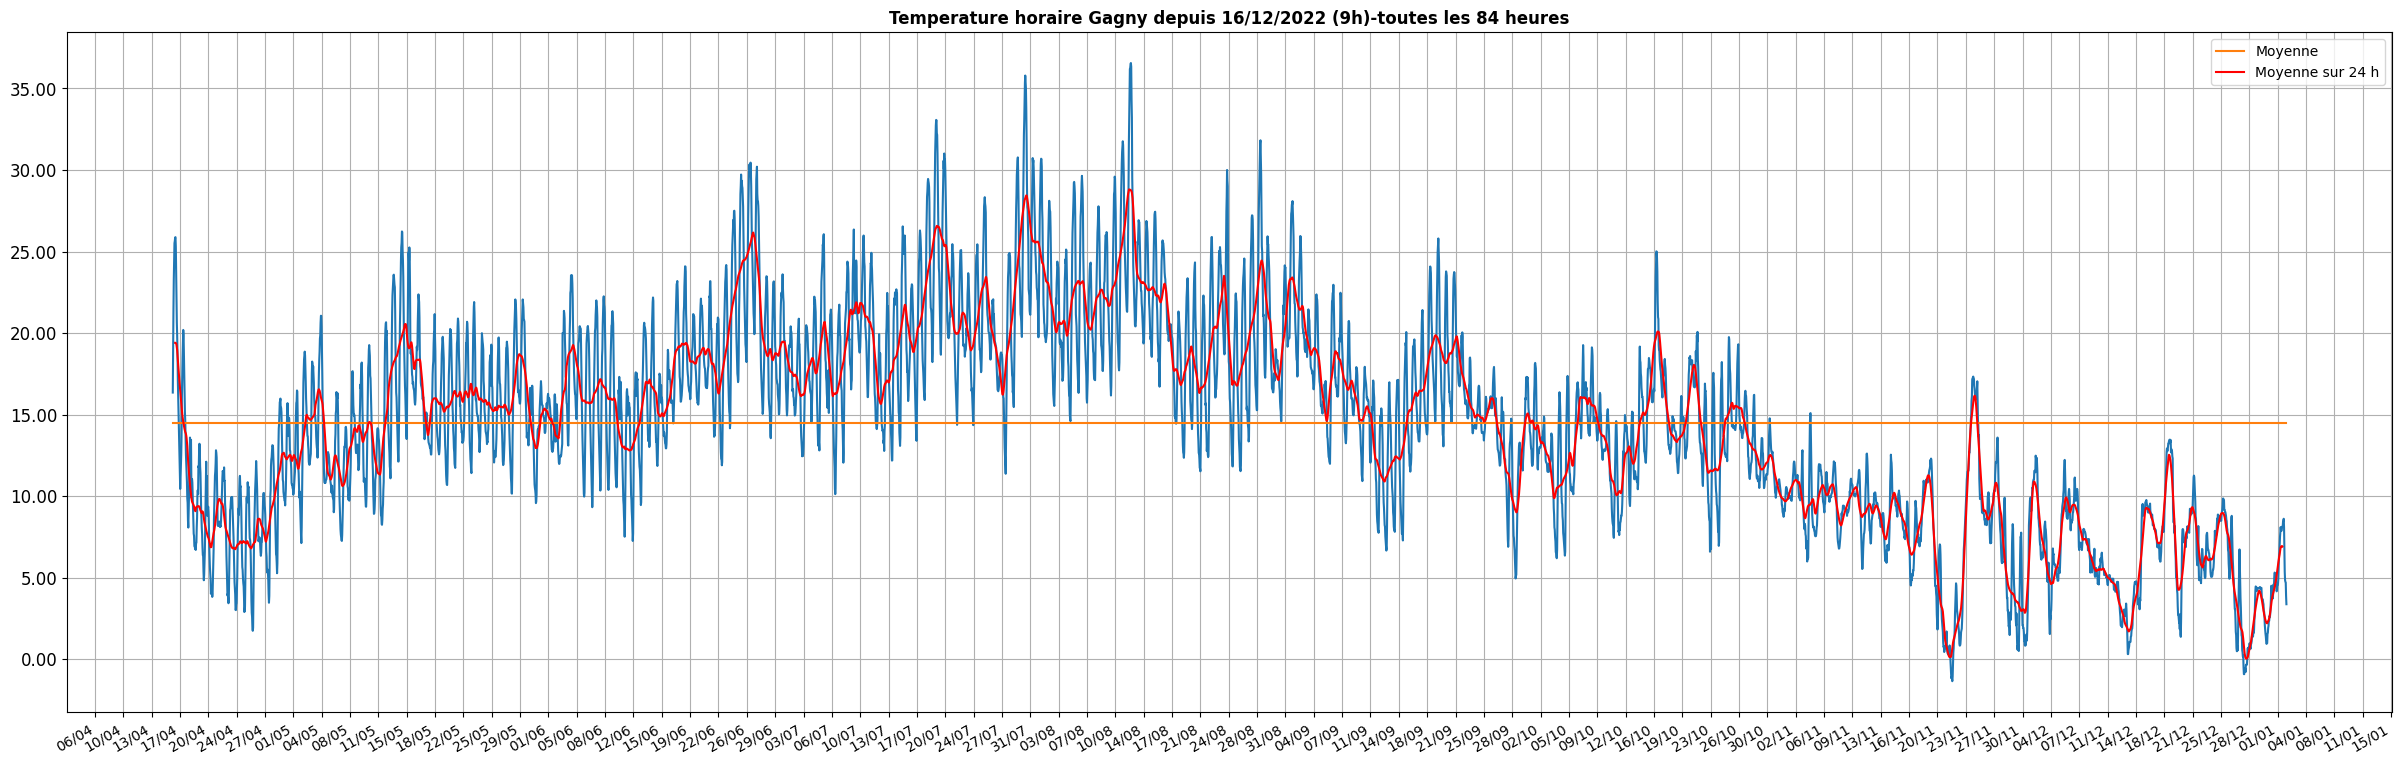

In [2059]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [2060]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
6264,4.85,20090.291667,02/01/25 07:00:00,-0.51
6265,4.74,20090.333333,02/01/25 08:00:00,-0.11
6266,4.70,20090.375000,02/01/25 09:00:00,-0.04
6267,3.88,20090.416667,02/01/25 10:00:00,-0.82


<Axes: >

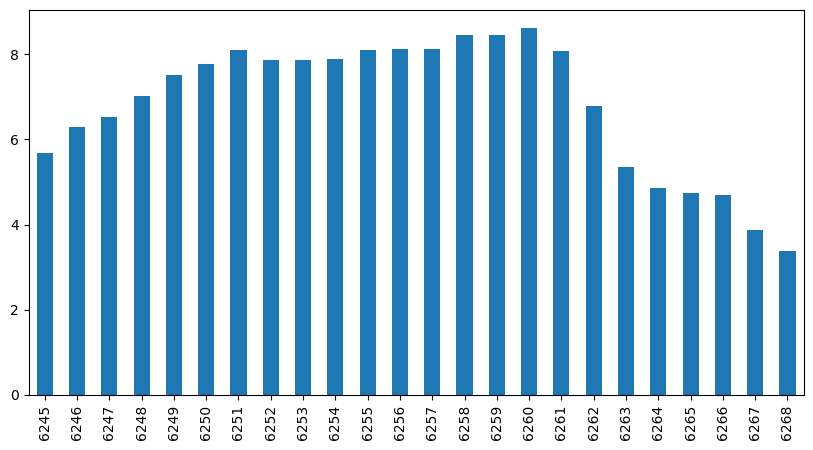

In [2061]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

In [2062]:
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
6264,4.85,20090.291667,02/01/25 07:00:00,-0.51
6265,4.74,20090.333333,02/01/25 08:00:00,-0.11
6266,4.70,20090.375000,02/01/25 09:00:00,-0.04
6267,3.88,20090.416667,02/01/25 10:00:00,-0.82


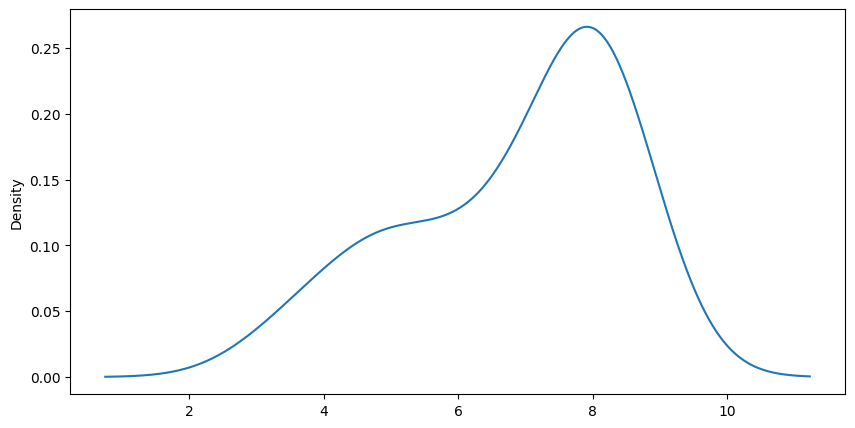

In [2063]:
span = 24
try:
    data.tail(span)['temp'].plot.kde(figsize=(10,5))
    #data['temp'].plot.kde(figsize=(10,5))
except:
    pass

<Axes: ylabel='Frequency'>

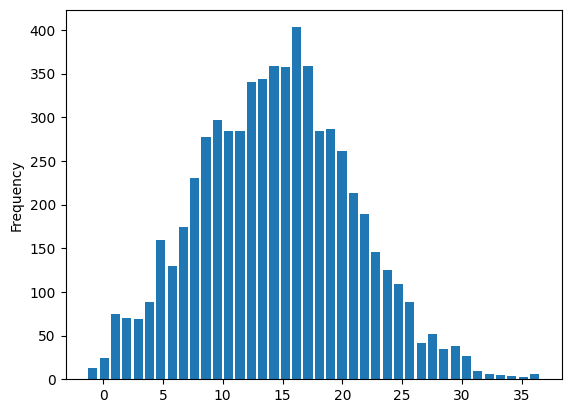

In [2064]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

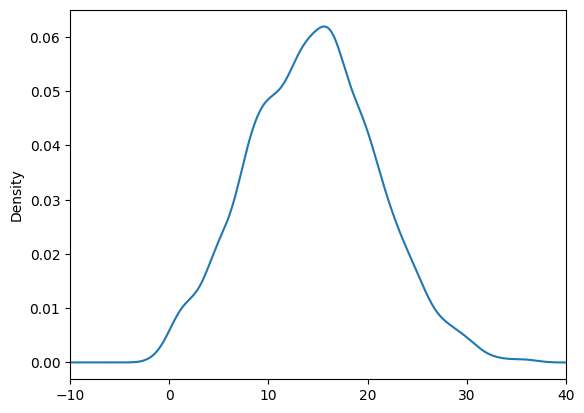

In [2065]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

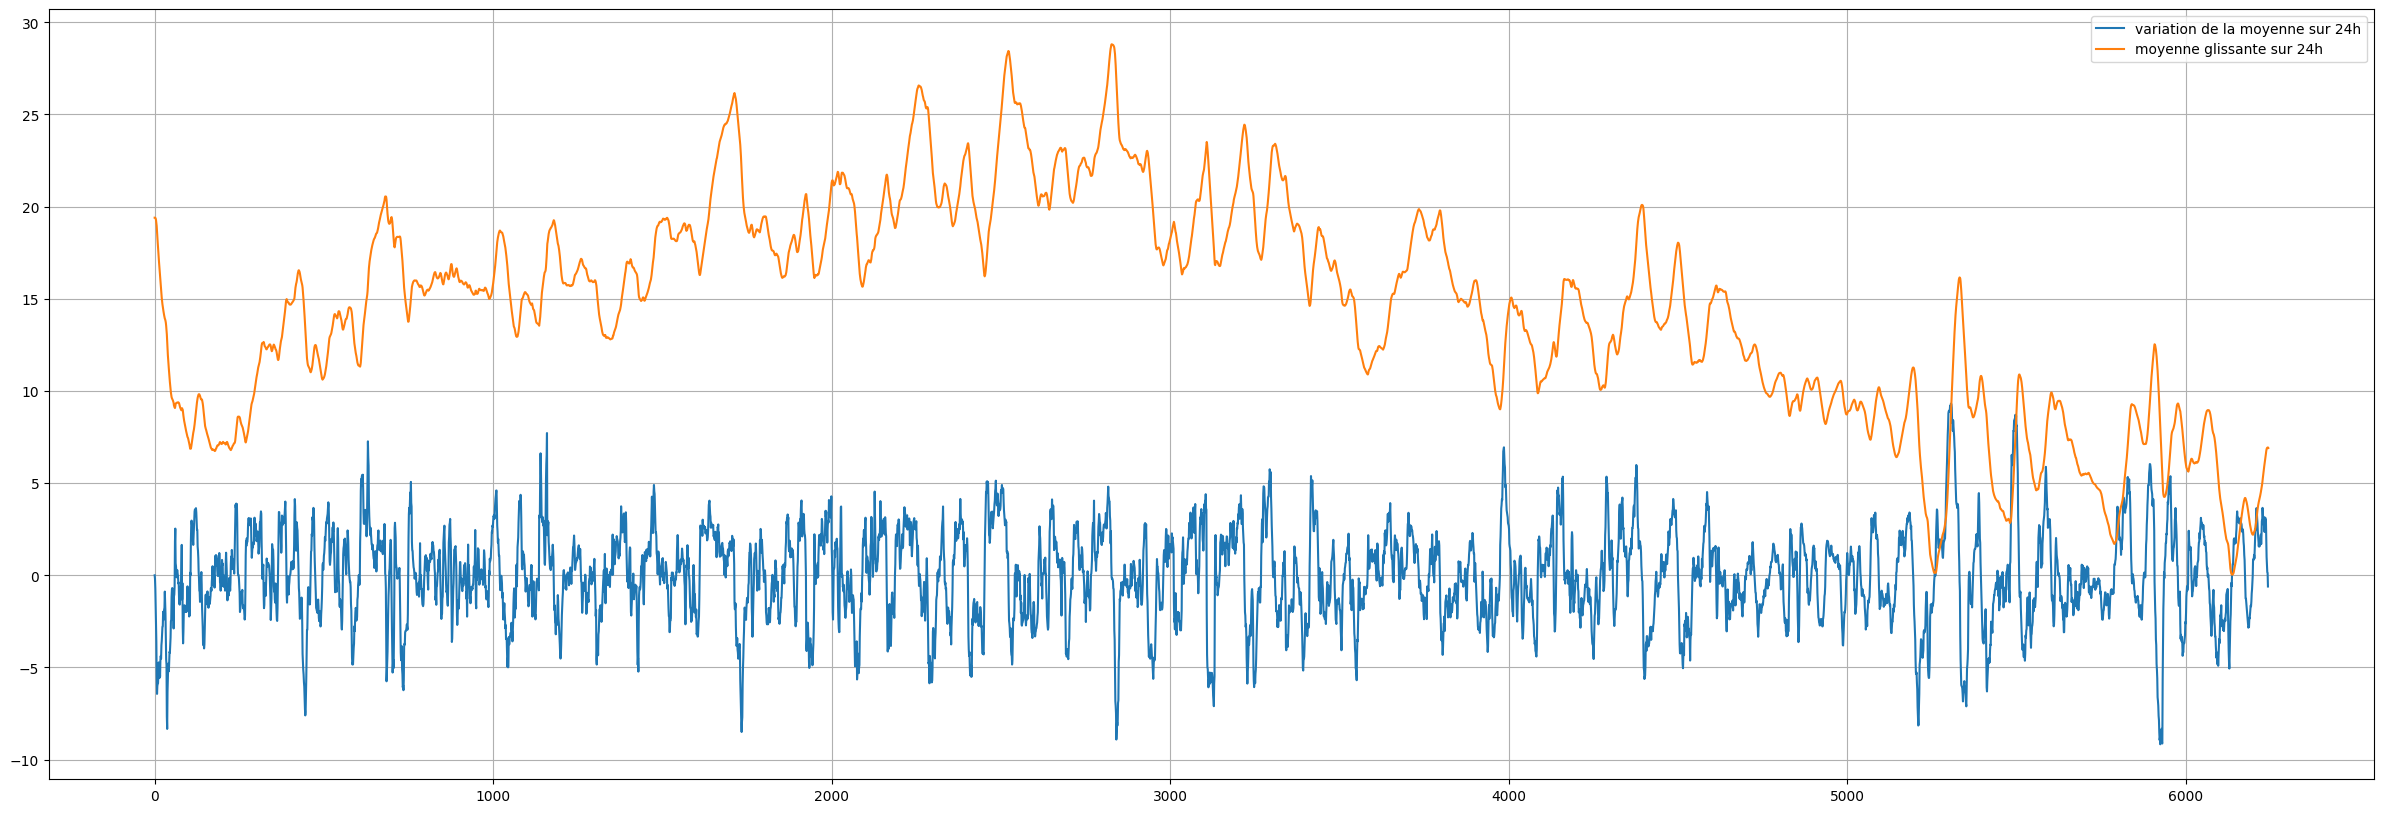

In [2066]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [2067]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [2068]:
window, days, interval

(24, 15, 12)

In [2069]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [2070]:
h

5909    20075.500000
5910    20075.541667
5911    20075.583333
5912    20075.625000
5913    20075.666667
            ...     
6264    20090.291667
6265    20090.333333
6266    20090.375000
6267    20090.416667
6268    20090.458333
Name: hours, Length: 360, dtype: float64

In [2071]:
datetime.now()

datetime.datetime(2025, 1, 2, 10, 56, 18, 938791)

In [2072]:
window_start

'18/12/2024, 10:56:18'

In [2073]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

5.740972222222243

In [2074]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, 5.740972222222243)

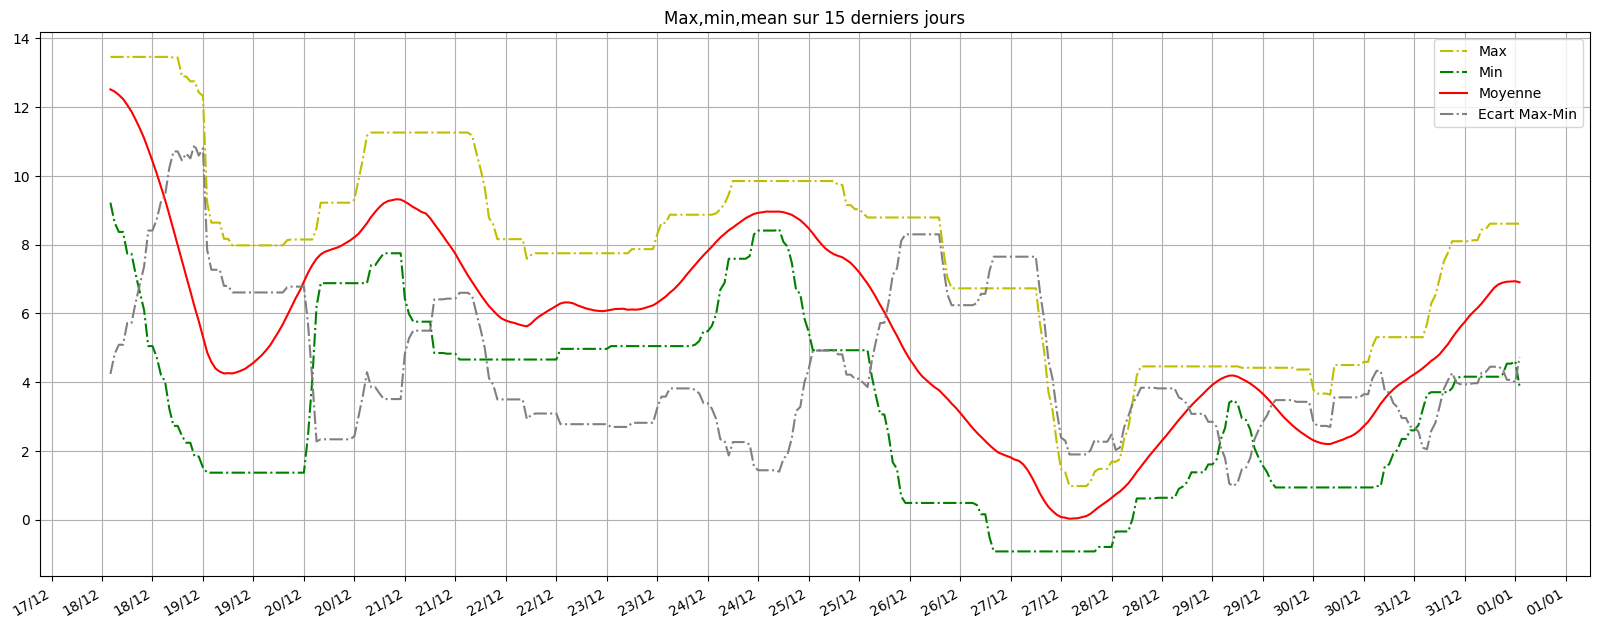

In [2075]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [2076]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

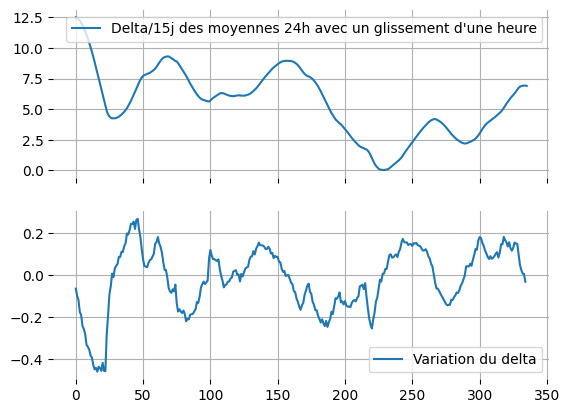

In [2077]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [2078]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [2079]:
# graphical output...
from pylab import sign, diff


In [2080]:
# plot graph with local max and min
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


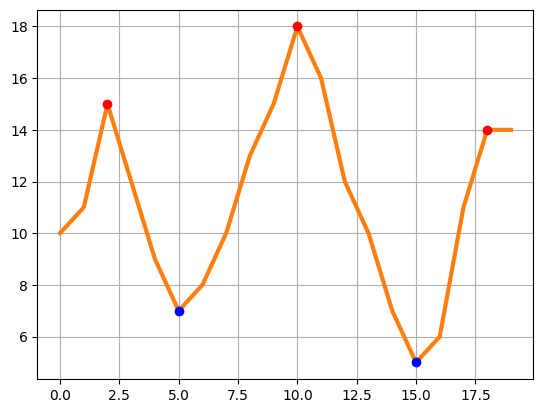

In [2081]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [2082]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data['jours']=[k.split(' ')[0] for k in data.dates]

data.tail(24*jours)[['jours','heures','temp','variation']]

,jours,heures,temp,variation
6101,26/12/24,12,5.60,0.63
6102,26/12/24,13,6.03,0.43
6103,26/12/24,14,7.23,1.20
6104,26/12/24,15,8.09,0.86
6105,26/12/24,16,8.68,0.59
...,...,...,...,...
6264,02/01/25,07,4.85,-0.51
6265,02/01/25,08,4.74,-0.11
6266,02/01/25,09,4.70,-0.04
6267,02/01/25,10,3.88,-0.82


In [2083]:
_min = round(data.tail(24*jours).temp.min(),2)
_max = round(data.tail(24*jours).temp.max(),2)

In [2084]:
_max - _min

9.709999999999999

## Main graph

(5.740972222222243, 15)

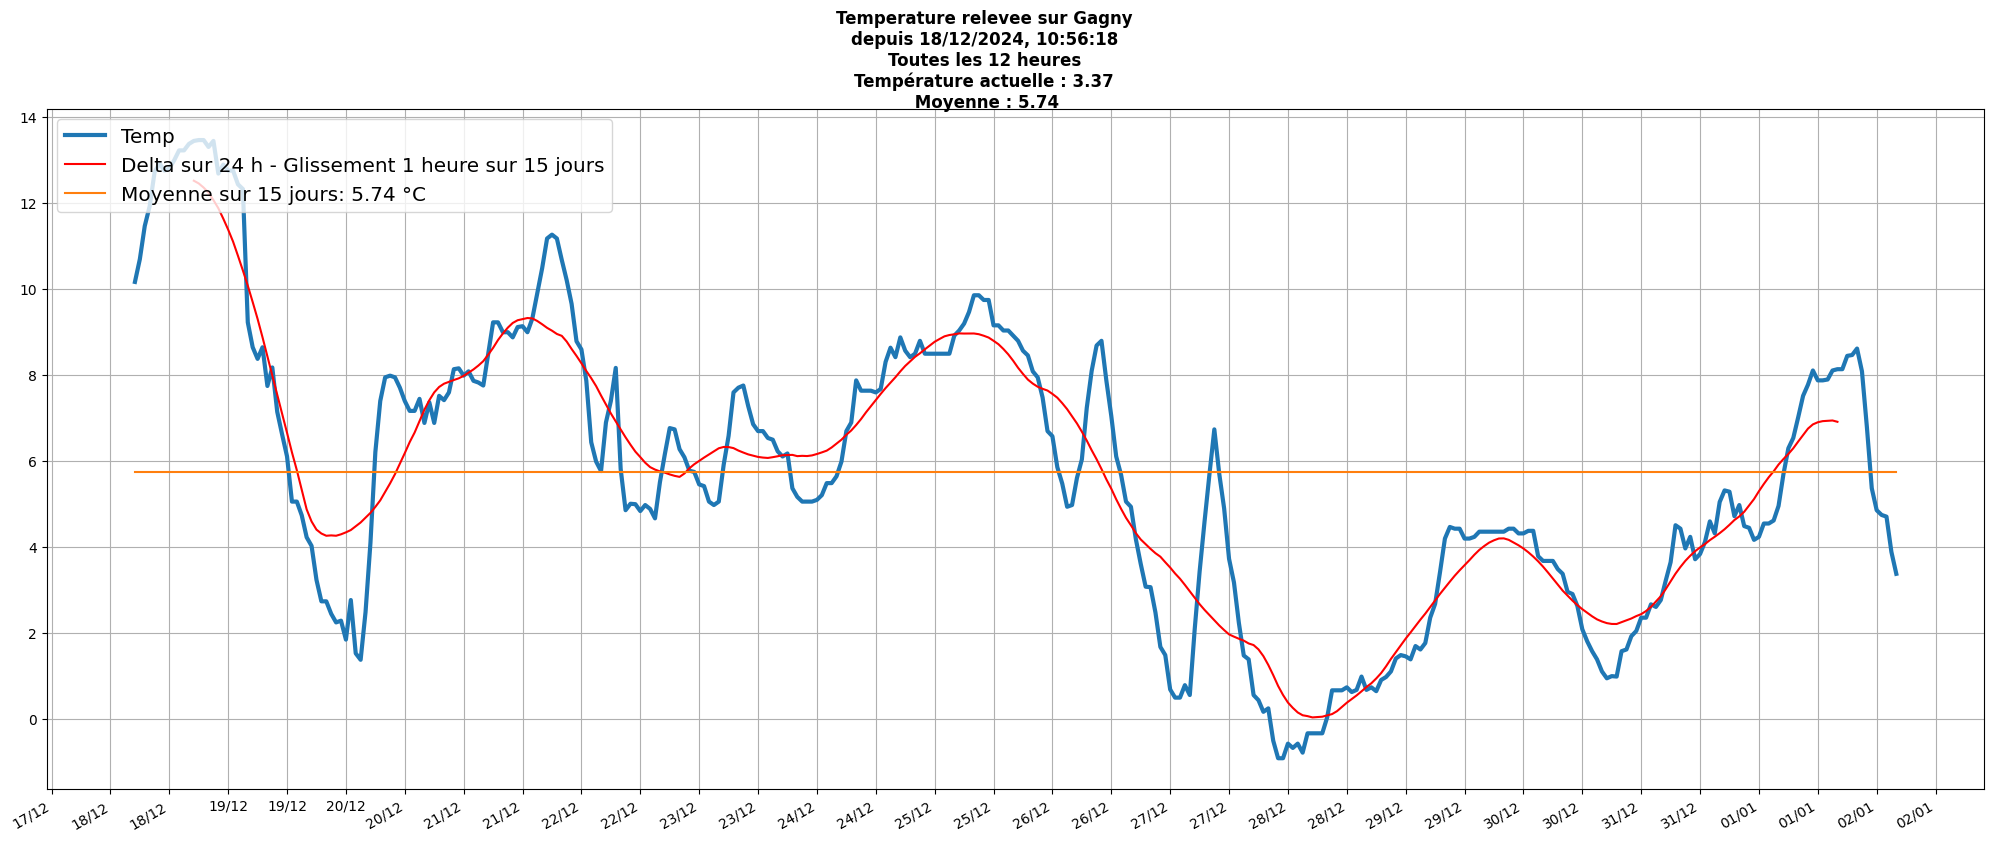

In [2085]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [2086]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
6264,07,4.85,-0.51
6265,08,4.74,-0.11
6266,09,4.70,-0.04
6267,10,3.88,-0.82
6268,11,3.37,-0.51


In [2087]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,1)

0.5

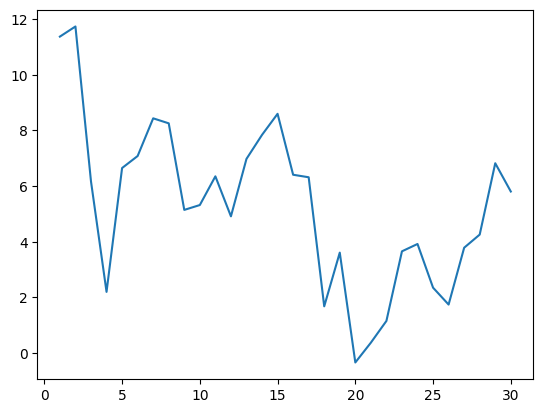

In [2088]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

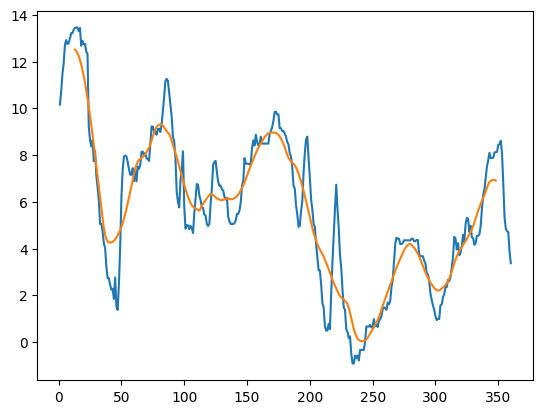

In [2089]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x25ecb930e00>])

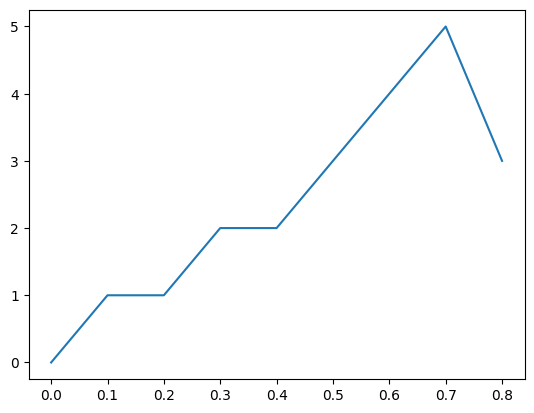

In [2090]:
df = [0,1,1,2,2,3,4,5,3]
dx = .1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x25ecb8fd850>])

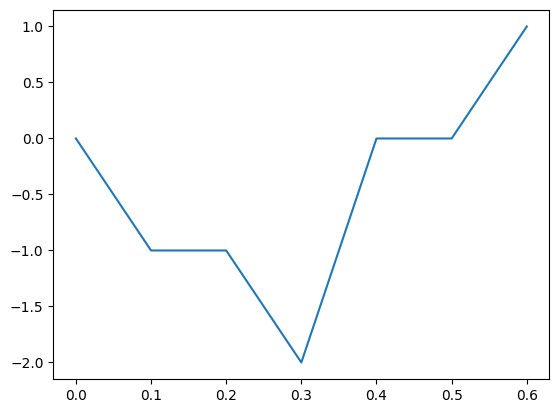

In [2091]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

In [2092]:
n = data.tail(1)['dates'].values[0]
n

'02/01/25 11:00:00'

# Température depuis 7 jours par heure

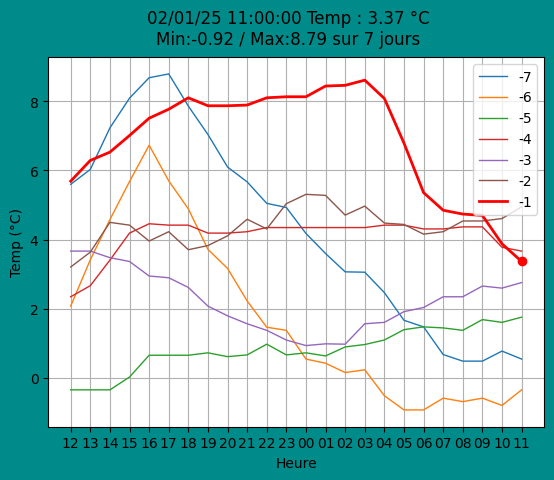

In [2093]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots(facecolor='darkcyan')
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
        
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"{n} Temp : {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min} / Max:{_max} sur {jours} jours")
plt.xlabel(f"Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()
plt.show()

In [2094]:
max_, min_ = np.max(list(data.tail(24*t).temp.head(24))), np.min(list(data.tail(24*t).temp.head(24)))

In [2095]:
max_,min_

(8.610000000000014, 3.3700000000000045)

In [2096]:
df_jours=data.tail(24*7)
df

[0, -1, -1, -2, 0, 0, 1]

In [2097]:
df_jours.groupby('jours')['temp'].mean()

jours
01/01/25    6.040833
02/01/25    6.284167
26/12/24    6.755833
27/12/24    2.815417
28/12/24    0.030000
29/12/24    2.597500
30/12/24    3.401667
31/12/24    3.013333
Name: temp, dtype: float64

<Axes: xlabel='jours'>

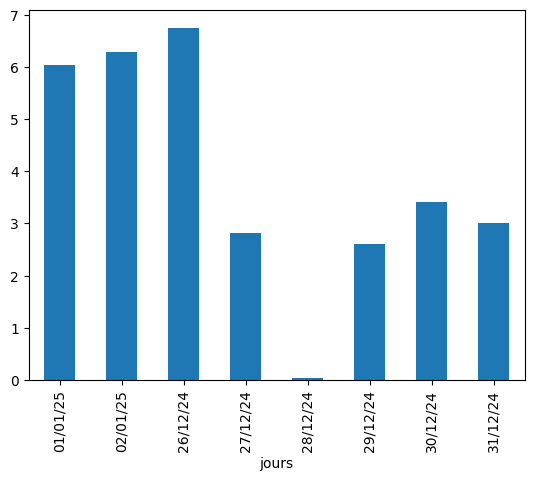

In [2098]:
df_jours.groupby('jours')['temp'].mean().plot(kind='bar')

In [2099]:
# save to csv    
csv_file = r"data_temp16122022.csv"
to_csv(csv_file, data)

In [2100]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
#ext  # create an error

import this
#dir(list)
#dir(str)

# how to label on top of a bar plot

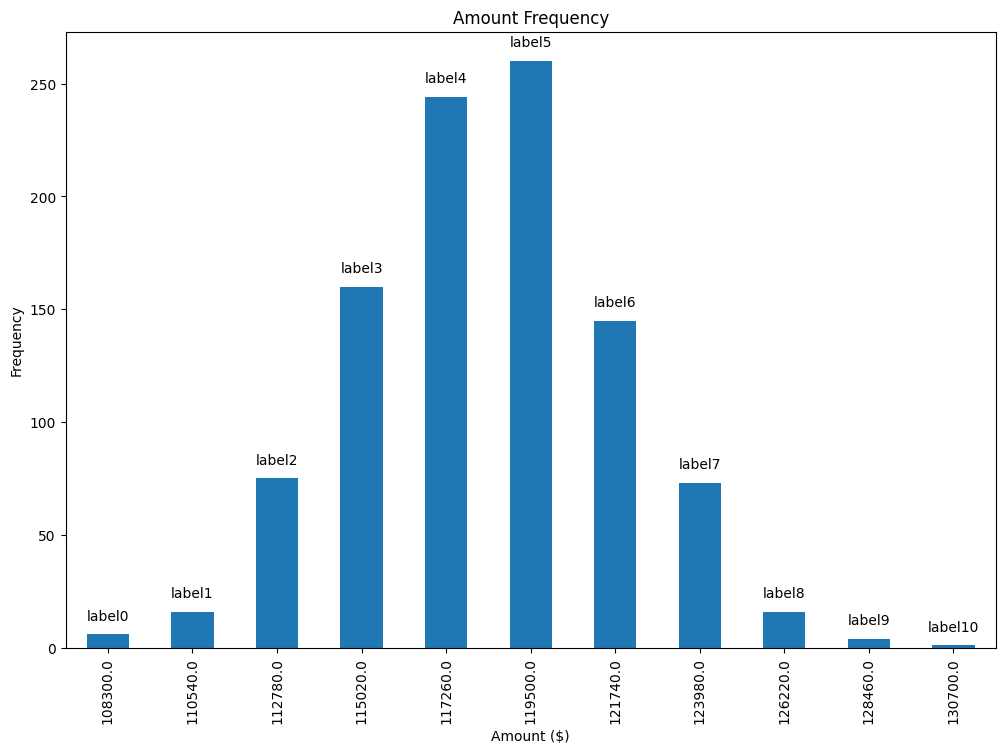

In [2101]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [2102]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25, [4.34, 1.67, 0.78, 4.0, 2.28, 4.34, 6.76])

In [2103]:
data

,temp,hours,dates,variation,heures,jours
0,13.19,19829.291667,16/04/24 07:00:00,NaN,07,16/04/24
1,12.20,19829.333333,16/04/24 08:00:00,-0.99,08,16/04/24
2,12.29,19829.375000,16/04/24 09:00:00,0.09,09,16/04/24
3,12.42,19829.416667,16/04/24 10:00:00,0.13,10,16/04/24
4,14.54,19829.458333,16/04/24 11:00:00,2.12,11,16/04/24
...,...,...,...,...,...,...
6264,4.85,20090.291667,02/01/25 07:00:00,-0.51,07,02/01/25
6265,4.74,20090.333333,02/01/25 08:00:00,-0.11,08,02/01/25
6266,4.70,20090.375000,02/01/25 09:00:00,-0.04,09,02/01/25
6267,3.88,20090.416667,02/01/25 10:00:00,-0.82,10,02/01/25


In [2104]:
areas


[4.41, 1.73, 0.78, 4.06, 2.24, 4.36, 6.87]

[Text(-8.0, 0, '-7'),
 Text(-7.0, 0, '-6'),
 Text(-6.0, 0, '-5'),
 Text(-5.0, 0, '-4'),
 Text(-4.0, 0, '-3'),
 Text(-3.0, 0, '-2'),
 Text(-2.0, 0, '-1'),
 Text(-1.0, 0, ''),
 Text(0.0, 0, '')]

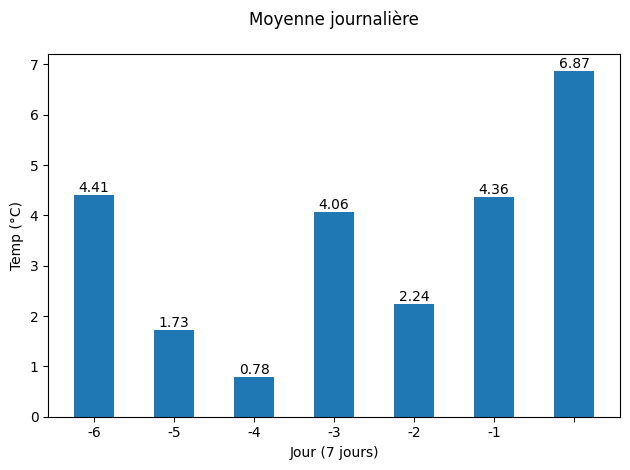

In [2105]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )
ax.set_xticklabels(X_axis)


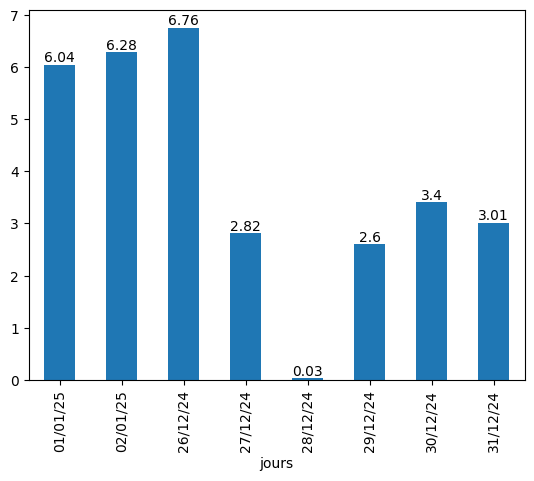

In [2106]:
fig, ax = plt.subplots()
df_jours.groupby('jours')['temp'].mean().plot(kind='bar')
rects = ax.patches

# Make some labels.
labels = [round(rects[i].get_height(),2) for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )


In [2107]:
labels

[6.04, 6.28, 6.76, 2.82, 0.03, 2.6, 3.4, 3.01]

In [2108]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([5.689999999999998,
  6.2900000000000205,
  6.53000000000003,
  7.010000000000048,
  7.510000000000048,
  7.770000000000039,
  8.100000000000023,
  7.870000000000003,
  7.870000000000003,
  7.890000000000043,
  8.100000000000023,
  8.129999999999995,
  8.129999999999995,
  8.439999999999998,
  8.460000000000036,
  8.610000000000014,
  8.080000000000041,
  6.7900000000000205,
  5.360000000000014,
  4.850000000000023,
  4.740000000000009,
  4.7000000000000455,
  3.879999999999996,
  3.3700000000000045],
 159.64000000000047)

In [2109]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

159.64000000000047

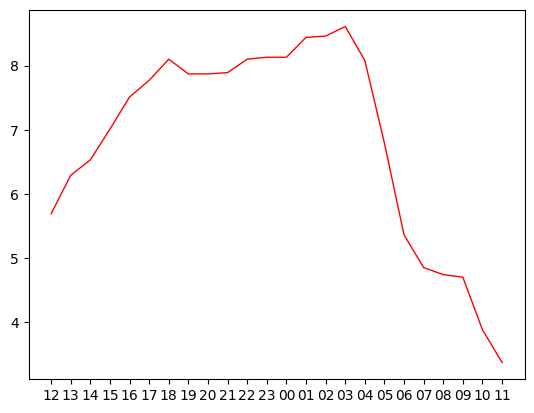

In [2110]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [2111]:
data.tail()


,temp,hours,dates,variation,heures,jours
6264,4.85,20090.291667,02/01/25 07:00:00,-0.51,07,02/01/25
6265,4.74,20090.333333,02/01/25 08:00:00,-0.11,08,02/01/25
6266,4.70,20090.375000,02/01/25 09:00:00,-0.04,09,02/01/25
6267,3.88,20090.416667,02/01/25 10:00:00,-0.82,10,02/01/25
6268,3.37,20090.458333,02/01/25 11:00:00,-0.51,11,02/01/25


In [2112]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([8.100000000000023, 8.129999999999995, 8.610000000000014],
 [5.689999999999998, 7.870000000000003, 8.129999999999995],
 3,
 3)

In [2113]:
_diff=[M-m for M,m in zip(_max, _min)]

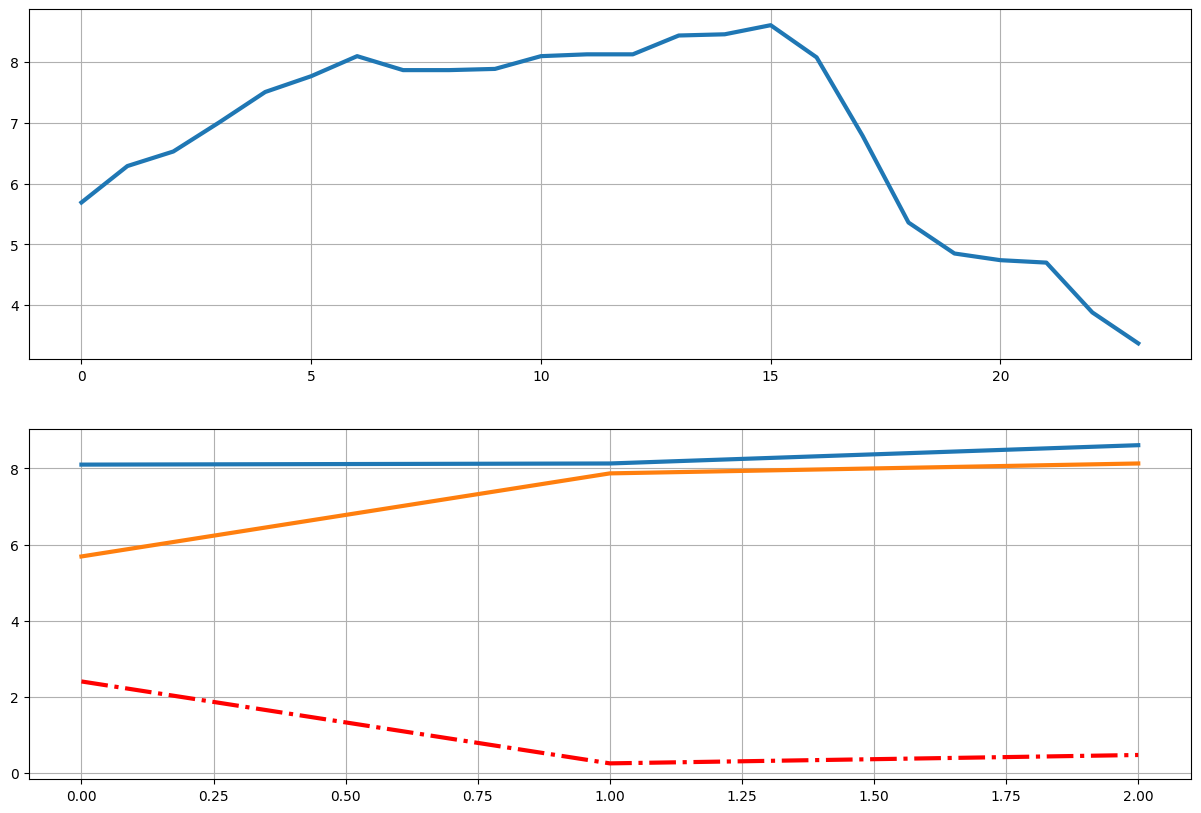

In [2114]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[] 0 [] 0
[] 0 [] 0


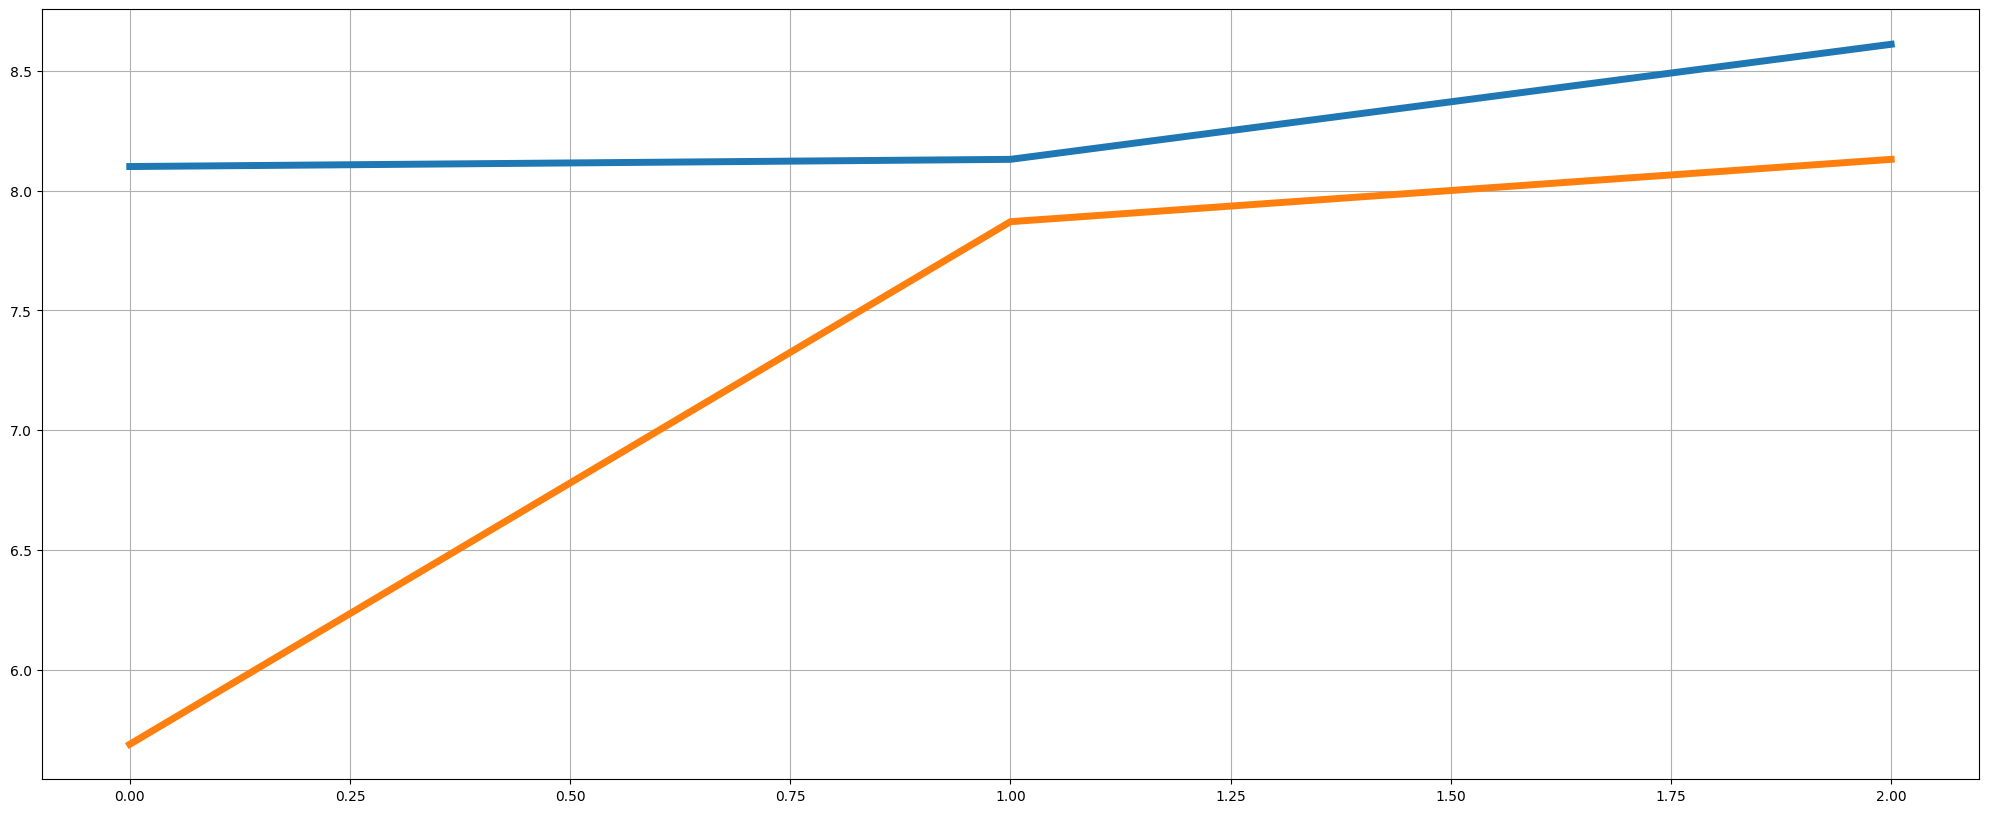

In [2115]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [2116]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [2117]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [2118]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [2119]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [2120]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17], dtype=int64),)

# maximas, minimas

[ 5 15] 2 [ 2 10 18] 3


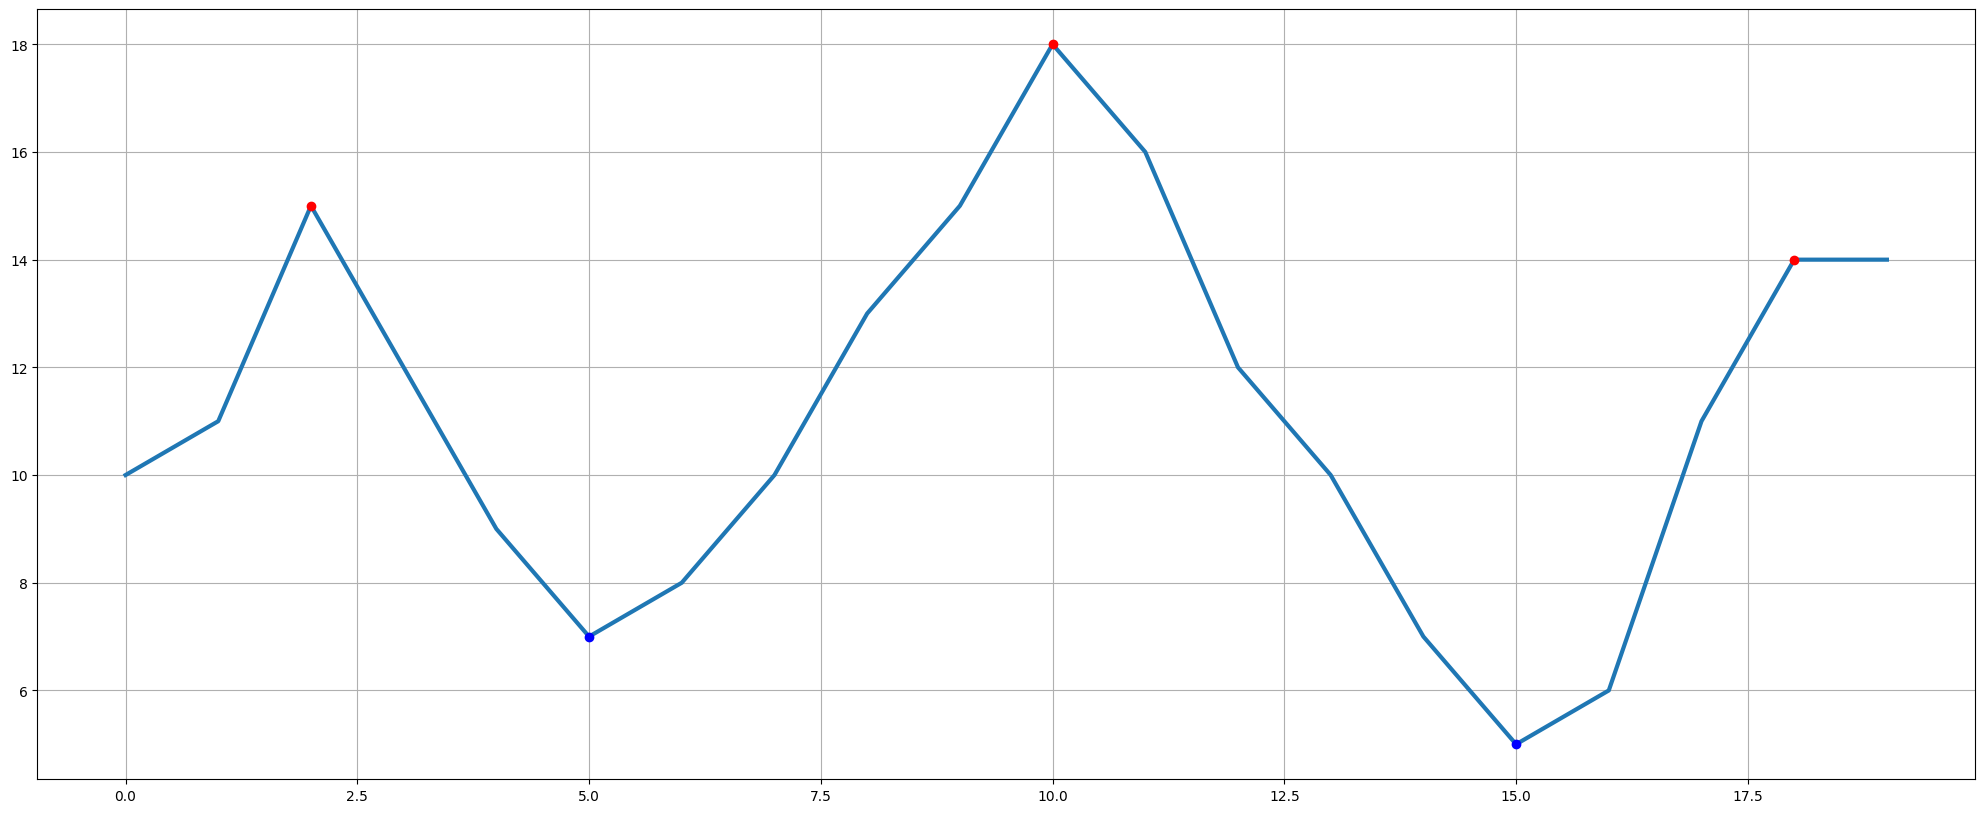

In [2121]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [2122]:
date_time_str,days,interval

('16/04/24 07:00:00', 15, 12)

## last records

In [2123]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
6101,5.60,8.162500
6102,6.03,8.019583
6103,7.23,7.887917
6104,8.09,7.795000
6105,8.68,7.721667
...,...,...
6264,4.85,6.895833
6265,4.74,6.921667
6266,4.70,6.930000
6267,3.88,6.936667


# temperature, moyenne, variation

<Axes: >

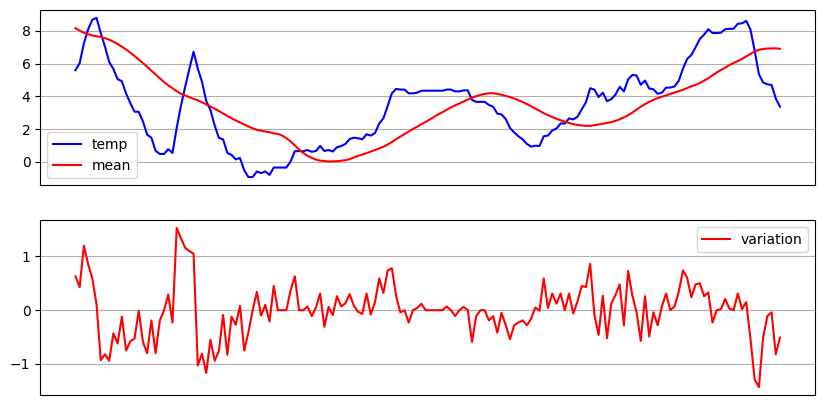

In [2124]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [2125]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(8.79000000000002, -0.9199999999999592)

In [2126]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [2127]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 8.44 1.54 6.9
J -28 6.79 4.81 1.98
J -27 12.22 5.6 6.62
J -26 11.14 7.9 3.24
J -25 10.44 6.69 3.75
J -24 7.94 5.31 2.63
J -23 6.77 4.58 2.19
J -22 6.53 4.54 1.99
J -21 5.16 4.14 1.02
J -20 4.74 1.96 2.78
J -19 3.41 0.31 3.1
J -18 4.77 3.06 1.71
J -17 9.76 5.66 4.1
J -16 9.54 7.31 2.23
J -15 9.65 5.98 3.67
J -14 13.46 9.22 4.24
J -13 8.64 1.37 7.27
J -12 8.15 4.09 4.06
J -11 11.26 5.76 5.5
J -10 8.16 4.66 3.5
J -9 7.75 5.05 2.7
J -8 8.91 5.98 2.93
J -7 9.85 4.93 4.92
J -6 8.79 0.49 8.3
J -5 6.73 -0.92 7.65
J -4 1.76 -0.34 2.1
J -3 4.46 2.35 2.11
J -2 3.67 0.94 2.73
J -1 5.31 3.21 2.1
J 0 8.61 3.37 5.24


<Axes: >

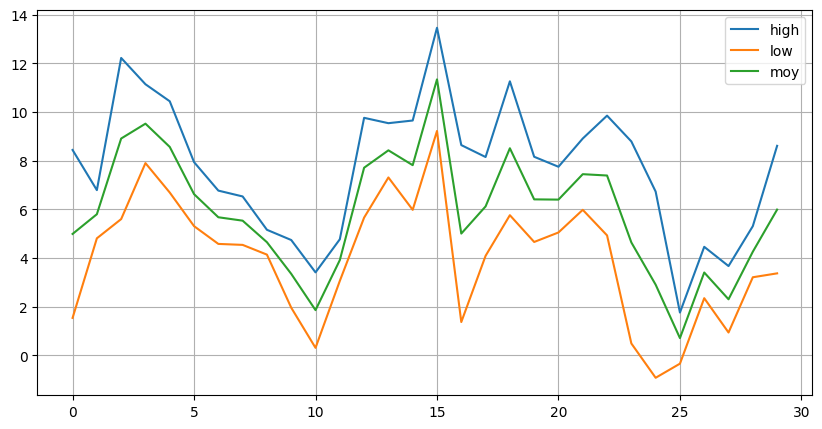

In [2128]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [2129]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[8.44, 12.22, 9.76, 13.46, 11.26, 9.85, 4.46]

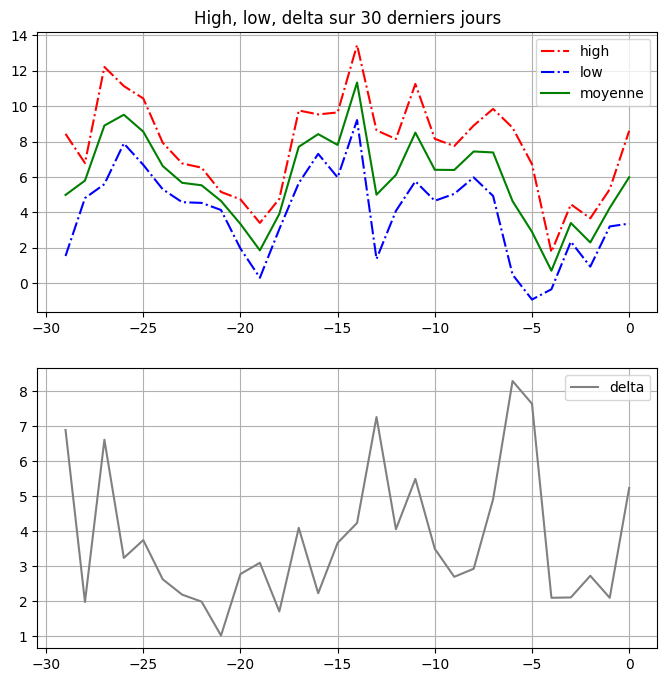

In [2130]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [2131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       6269 non-null   float64
 1   hours      6269 non-null   float64
 2   dates      6269 non-null   object 
 3   variation  6268 non-null   float64
 4   heures     6269 non-null   object 
 5   jours      6269 non-null   object 
dtypes: float64(3), object(3)
memory usage: 294.0+ KB


In [2132]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [2133]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [2134]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

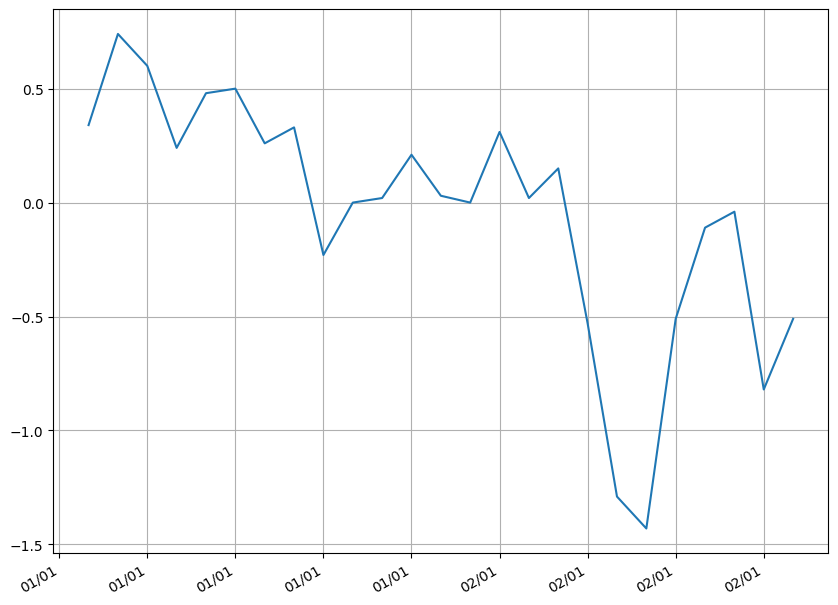

In [2135]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [2136]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, 13.460000000000036, -0.9199999999999592)

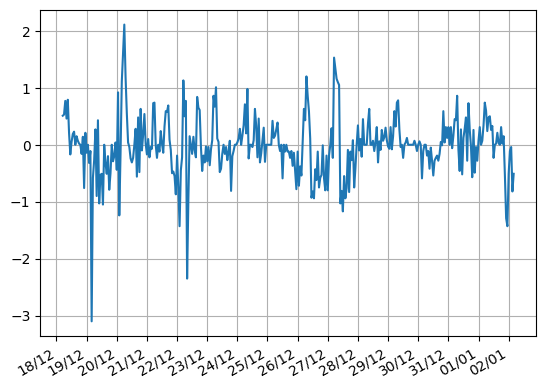

In [2137]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [2138]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(13.460000000000036,
 329     30/04/24 00:00:00
 645     13/05/24 04:00:00
 913     24/05/24 08:00:00
 1060    30/05/24 11:00:00
 3142    25/08/24 05:00:00
 4436    18/10/24 03:00:00
 4485    20/10/24 04:00:00
 5922    19/12/24 01:00:00
 5923    19/12/24 02:00:00
 Name: dates, dtype: object)

In [2139]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(-0.9199999999999592,
 6142    28/12/24 05:00:00
 6143    28/12/24 06:00:00
 Name: dates, dtype: object)

In [2140]:
data.tail(w)['temp'].describe()

count    360.000000
mean       5.740972
std        3.321809
min       -0.920000
25%        3.570000
50%        5.620000
75%        8.092500
max       13.460000
Name: temp, dtype: float64

In [2141]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('02/01/25 10:57:09', 3.37)

In [2142]:
# current date and time
ts = datetime.timestamp(today)
ts

1735811829.120809